In [100]:
import numpy as np
import math
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
torch.set_printoptions(precision=5)


def lsum(x):
    return x.max() + torch.log(torch.exp(x-x.max()).sum())

### Matlab Bessel to Pytorch

Modified Bessel $I$

$$
\sum_{m=0}^{\infty} \frac{1}{\Gamma(m+1) \Gamma(m+\alpha+1)}\left(\frac{x}{2}\right)^{2 m+\alpha}
$$



Log in Matlab
```
function logI = myModifiedBessel(a,x,order)

order = 0:order;

q = -gammaln(order+1) - gammaln(order+a+1) + (2*order+a) * log(x/2);

logI = log(sum(exp(q-max(q)))) + max(q);

```

##### Pytorch/Python

In [39]:
a = np.array([0,3,4])
b = np.array([3])
a = np.concatenate((a,b))
a

array([0, 3, 4, 3])

tensor(0.60760444402694702148)
tensor(0.60760444402694702148)
tensor(0.60760444402694702148)


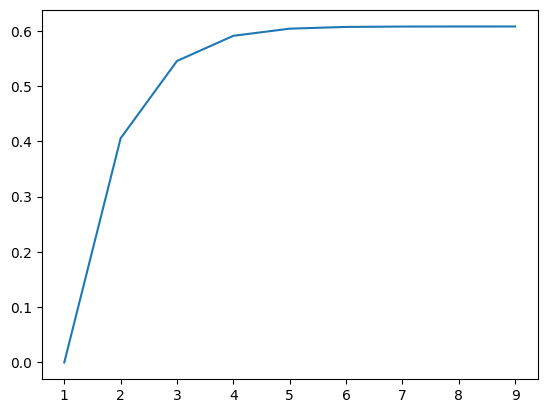

In [42]:
a, b, kappa = torch.tensor(1/2), torch.tensor(3/2), torch.tensor(1.5)
T = 10
arr = np.zeros(T)
for prec in range(T):
    n = torch.arange(prec)
    inner = torch.lgamma(a+n) + torch.lgamma(b) - torch.lgamma(a) - torch.lgamma(b+n) \
        + n * torch.log(kappa) - torch.lgamma(n+torch.tensor(1))

    out = np.array(torch.logsumexp(inner,dim=0))
    arr[prec] = out
    
plt.plot(arr)
print(torch.logsumexp(inner, dim=0))
print(lsum(inner))
print(torch.log(torch.sum(torch.exp(inner))))

In [ ]:
def logI(a,x,order):
    order_v = np.arange(0,order+1)
    
    
    
    logI_bessel = torch.
    
    return logI_bessel


In [2]:
a1 = torch.tensor(np.pi)
a2 = torch.tensor(math.pi)


tensor(3.1416)


In [17]:
p = 3


b1 = torch.log(torch.tensor(2*np.pi**(p/2)))
b2 = torch.log(torch.tensor(3/4*np.pi))
print(b1,b2)

tensor(2.4102) tensor(0.8570)


In [78]:
class WatsonDistribution(nn.Module):
    """
    Multivariate Watson distribution class
    """
    def __init__(self,p, para_init=None):
        super().__init__()
        self.p = p
        self.mu = nn.Parameter(torch.ones(3))
        self.kappa = nn.Parameter(torch.rand(self.p,self.p))
        

W = WatsonDistribution(p=3)

In [82]:
W.state_dict()['mu'] *= 3

In [83]:
W.state_dict()

OrderedDict([('mu', tensor([3., 3., 3.])),
             ('kappa',
              tensor([[0.2341, 0.1961, 0.5224],
                      [0.1311, 0.9199, 0.1865],
                      [0.9313, 0.2443, 0.9681]]))])

In [56]:
x = torch.tensor([3,3,3])
A = torch.tensor([[1,1,1],[2,2,2],[10,10,10]])
torch.matmul(x,A)

tensor([39, 39, 39])

In [74]:
mu = nn.Parameter(torch.ones(3,3))
mu.__repr__

<bound method Parameter.__repr__ of Parameter containing:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)>

In [90]:
K = 10
p=3
mu = torch.zeros(p,K)
for j in range(K):
        val = 1 if j % 2 == 0 else -1
        mu[(j*int(p/K)),j] = val
mu

tensor([[ 1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [92]:
torch.ones(K)*1/K

tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000])

In [190]:
v = torch.rand(5)
print(torch.linalg.norm(v/torch.linalg.norm(v,dim=0)))
print(v/torch.linalg.norm(v,dim=0))
print(torch.linalg.norm(nn.functional.normalize(v,dim=0)))

tensor(1.)
tensor([0.4365, 0.6558, 0.0900, 0.2037, 0.5743])
tensor(1.)


In [201]:
softplus = nn.Softplus()


with torch.autograd.profiler.profile() as prof:

    y = softplus(torch.log(nn.Parameter(torch.rand(1))))
    y.backward()
    
print(prof.key_averages().table(sort_by="self_cpu_time_total"))

-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                           LogBackward0        49.66%     291.000us        53.58%     314.000us     314.000us             1  
                                              aten::log         8.02%      47.000us         8.02%      47.000us      47.000us             1  
                                    aten::empty_strided         5.12%      30.000us         5.12%      30.000us      30.000us             1  
                                         aten::softplus         4.95%      29.000us         4.95%      29.000us      29.000us             1  
      

In [21]:
class LogWatson(nn.Module):
    """
    Logarithmic Multivariate Watson distribution class
    """
    def __init__(self,p, para_init=None):
        super().__init__()

        self.p = p
        self.mu = nn.Parameter(torch.ones(self.p))
        self.kappa = nn.Parameter(torch.tensor([1.]))

        if para_init is not None:
            print('Custom Initilization of')
            #for special initialization of patamters

            
    def log_kummer(self, a, c, kappa):
        # inspiration form Morten Bessel function
        # Gamma based? see Mardia A.18
        logKum = torch.log(torch.tensor(0.5))
        return logKum

    def log_norm_constant(self):
        logC =  torch.lgamma(torch.tensor([self.p/2])) \
               - torch.log(torch.tensor(2 * np.pi**(self.p/2))) \
               - self.log_kummer(0.5, self.p/2, self.kappa)

        return logC

    def log_pdf(self,x):
        # Why Transpose in the end? see LL_Torch_Watson
        logpdf = self.log_norm_constant() + self.kappa * (self.mu @ x)**2
        return logpdf

    def forward(self,X):
        return self.log_pdf(X)
    
m = [LogWatson(p=3)]*10

# Watson = nn.ModuleList([w(p=3) for w in m])
# for Wat in Watson:
#     print(Wat.mu)
gen = m[0].parameters()

In [32]:
next(iter(gen))

StopIteration: 

In [177]:
m = [LogWatson(p=3) for _ in range(5)]

for w in m:
    print(id(w))

139674543406864
139674543402544
139674543399856
139674543391408
139674543405088


In [154]:
W1 = LogWatsonMultivariate(p=3)

W1.log_pdf(torch.tensor([[1.,2.,3.]]))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x3 and 2x3)

In [7]:
mu = torch.Tensor([1.,1.,1.])
X = torch.Tensor([[2.,2.,2.],[4.,4.,4.],[5.,5.,5.],[7.,7.,7.]])
# [6, 12, 15, 21]

torch.matmul(mu,X.T).T

/tmp/ipykernel_10483/4119580291.py:5: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2981.)
  torch.matmul(mu,X.T).T


tensor([ 6., 12., 15., 21.])

In [11]:
torch.eye(10,10)/10

tensor([[0.1000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.1000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.1000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.1000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.1000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.1000]])

In [16]:
L = torch.tril(torch.rand(3,3))
print(L)
print('---')
print(L.T)
print('---')
print(L@L.T)

tensor([[0.2584, 0.0000, 0.0000],
        [0.3535, 0.8070, 0.0000],
        [0.4461, 0.8540, 0.8373]])
---
tensor([[0.2584, 0.3535, 0.4461],
        [0.0000, 0.8070, 0.8540],
        [0.0000, 0.0000, 0.8373]])
---
tensor([[0.0668, 0.0914, 0.1153],
        [0.0914, 0.7763, 0.8470],
        [0.1153, 0.8470, 1.6295]])


### LogSumExp test

In [150]:
torch.set_printoptions(precision=20)

def lsum(x):
    return x.max() + torch.log(torch.exp(x-x.max()).sum())

def LS(x):
    return torch.logsumexp(x, dim=0)

xv = torch.rand(1378,5)

print(lsum(xv))
print(LS(xv))

tensor(9.37889480590820312500)
tensor([7.76395654678344726562, 7.76422023773193359375, 7.76731348037719726562,
        7.78229856491088867188, 7.76937866210937500000])


### Torch Rock & Tril 

In [50]:
pL = nn.Parameter(torch.tril(torch.ones(4,4),-1))
print(pL)
print('---')
print(torch.tril(pL,-1))

Parameter containing:
tensor([[0., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 1., 0., 0.],
        [1., 1., 1., 0.]], requires_grad=True)
---
tensor([[0., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 1., 0., 0.],
        [1., 1., 1., 0.]], grad_fn=<TrilBackward0>)


In [58]:
torch.tril(torch.ones(4,4),-1) + torch.eye(4) * torch.rand(4)

tensor([[0.8404, 0.0000, 0.0000, 0.0000],
        [1.0000, 0.5550, 0.0000, 0.0000],
        [1.0000, 1.0000, 0.5823, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.6025]])

##### ACG multiplication check

In [10]:
x = torch.randint(5,(5,3))
A = torch.randint(10,(3,3))
print(f'X matrix: \n {x}')
print(f'A matrix: \n {A}')

X matrix: 
 tensor([[1, 1, 2],
        [1, 1, 1],
        [1, 4, 0],
        [1, 0, 2],
        [2, 0, 0]])
A matrix: 
 tensor([[0, 0, 2],
        [3, 7, 1],
        [4, 0, 7]])


In [35]:
b = torch.tensor([2,3,4])
b@A@b

tensor(253)

In [ ]:
# [11,7,17]

In [43]:
11+7+2*17

52

In [25]:
x@A

tensor([[11,  7, 17],
        [ 7,  7, 10],
        [12, 28,  6],
        [ 8,  0, 16],
        [ 0,  0,  4]])

tensor([[ 52,  35,  39,  45,  22],
        [ 34,  24,  35,  27,  14],
        [ 52,  46, 124,  24,  24],
        [ 40,  24,   8,  40,  16],
        [  8,   4,   0,   8,   0]])

In [70]:
torch.diag(x@A@x.T)

tensor([ 52,  24, 124,  40,   0])

In [69]:
x@x.T

tensor([[ 6,  4,  5,  5,  2],
        [ 4,  3,  5,  3,  2],
        [ 5,  5, 17,  1,  2],
        [ 5,  3,  1,  5,  2],
        [ 2,  2,  2,  2,  4]])

In [86]:
g = torch.randint(10,(5,))
b = torch.tensor(10)
print(g)
print(g*b)
g*b*g

tensor([8, 8, 3, 0, 9])
tensor([80, 80, 30,  0, 90])


tensor([640, 640,  90,   0, 810])

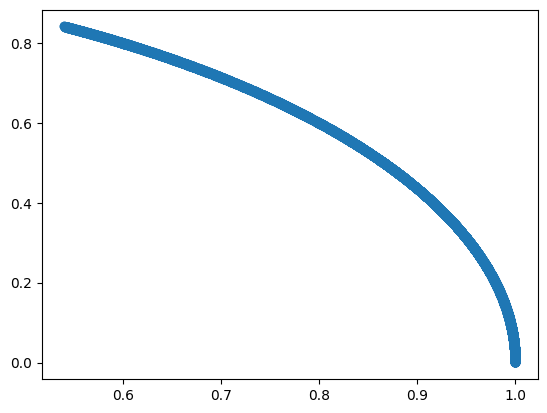

In [119]:
phi = torch.arange(0, 2*np.pi, 0.01)
phi = torch.rand(10000)
x = torch.column_stack((torch.cos(phi),torch.sin(phi)))
plt.scatter(x[:,0],x[:,1])



In [114]:
torch.tensor([[1,4],[4,1]])

tensor([[1, 4],
        [4, 1]])